In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [12]:
def mostrar(imagen, color="gray", ejes="off"):
    plt.imshow(imagen, cmap=color)
    plt.axis(ejes)
    plt.show()

In [14]:
imagen_buena = data.astronaut()[:200, :200]

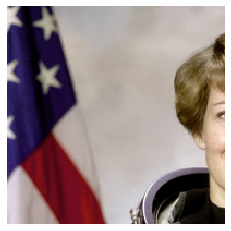

In [16]:
mostrar(imagen_buena)

#### * creacion de la mascara

In [18]:
mascara = np.zeros(imagen_buena.shape[:-1])

In [20]:
mascara[20:60, 0:20] = 1
mascara[160:180, 70:155] = 1
mascara[30:60, 170:195] = 1

#### * creacion de la imagen defectuosa

In [22]:
imagen_defectuosa = imagen_buena.copy()

In [24]:
# where indica que donde sea True (1) se convierte a valor 0
imagen_defectuosa[np.where(mascara)] = 0

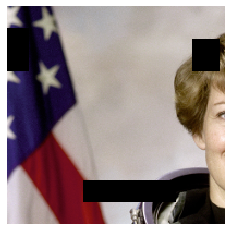

In [26]:
mostrar(imagen_defectuosa)

#### * recuperacion de la imagen o restaurar la imagen defectuosa

In [28]:
from skimage.restoration import inpaint_biharmonic

In [30]:
# a la funcion se pasa la imagen defectuosa
# la mascara a la cual se pasa los valores
# y le indicamos si la imagen es multicanal
imagen_corregida = inpaint_biharmonic(imagen_defectuosa, mascara, multichannel=True)

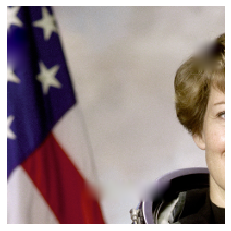

In [32]:
mostrar(imagen_corregida)

#### * agregando ruido a una imagen

In [34]:
from skimage.util import random_noise

In [36]:
cohete = data.rocket()

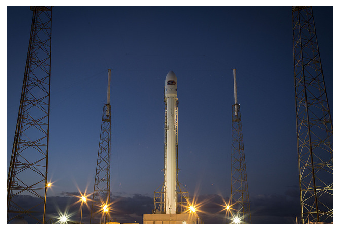

In [38]:
mostrar(cohete)

In [40]:
# creando el ruido de sal y pimienta
cohete_ruido = random_noise(cohete)

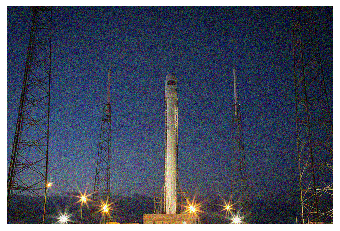

In [42]:
mostrar(cohete_ruido)

#### * eliminando ruido de una imagen

In [43]:
from skimage.restoration import denoise_tv_chambolle

In [44]:
# total variation
cohete_tv = denoise_tv_chambolle(cohete_ruido, multichannel=True)

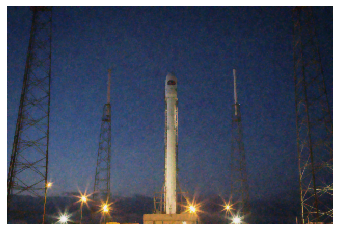

In [45]:
mostrar(cohete_tv)

In [46]:
from skimage.restoration import denoise_bilateral

In [47]:
# promedio de los de a lado
cohete_bilateral = denoise_bilateral(cohete_ruido, multichannel=True)

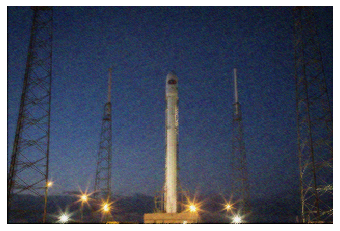

In [48]:
mostrar(cohete_bilateral)

#### - ESTUDIAR CONCEPTO DE SUPER PIXEL, ESTO SIRVE PARA LA SEGMENTACION, ESTE NOS DA PIXELES CON MAYOR SIGNIFICADO Y LE DA UNA MAYOR EFICIENCIA COMPUTACIONAL  

#### - ESTUDIAR SEGMENTACION NO SUPERVISADA COMO EL K MEANS

In [49]:
cafe = data.coffee()

In [50]:
cafe.shape[:-1]

(400, 600)

In [51]:
cafe.shape[0]*cafe.shape[1]

240000

#### * vamos a realizar una segmentacion

In [57]:
    from skimage.segmentation import slic
    from skimage.color import label2rgb

In [67]:
# Etiquetado cada pixel de la imagen
# Esto lo que hace es dividir en clusters o segmentaciones
segmentos_default = slic(cafe)

In [69]:
np.max(segmentos_default)

67

In [70]:
segmentos_default.shape

(400, 600)

In [71]:
# cambiar de etiquetas a color, la vamos a cambiar por el color promedio
# esto esta dividiendo en clusters
cafe_segmentado = label2rgb(segmentos_default, cafe, kind='avg')

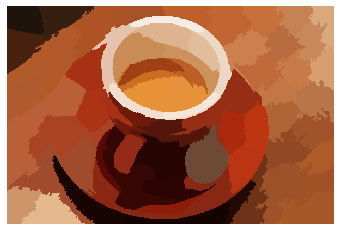

In [64]:
mostrar(cafe_segmentado)

In [72]:
# dividir en 400 clusters
segmentos_400 = slic(cafe, n_segments=400)

In [74]:
cafe_segmentado_400 = label2rgb(segmentos_400, cafe, kind='avg')

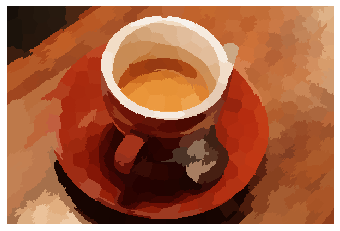

In [75]:
mostrar(cafe_segmentado_400)